In [132]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]

In [133]:
#nz_region.geojson representing simple geographical features in new zealand
nz = geopandas.read_file('/Users/wangzhuoxin/Desktop/project_resource/nz_region.geojson')
nz

,REGC2016,REGC2016_N,AREA_SQ_KM,LAND_SQ_KM,rmapshaperid,geometry
0,01,Northland Region,12510.3503,12497.9209,0,"MULTIPOLYGON (((174.70210 -35.95510, 174.70580..."
1,02,Auckland Region,4940.8756,4939.8049,1,"MULTIPOLYGON (((175.16600 -36.90360, 175.16900..."
2,03,Waikato Region,24578.1774,23899.7930,2,"MULTIPOLYGON (((174.86390 -38.10250, 174.86610..."
3,04,Bay of Plenty Region,12280.4622,12070.5112,3,"MULTIPOLYGON (((177.13920 -38.01110, 177.13480..."
4,05,Gisborne Region,8385.8161,8385.8161,4,"MULTIPOLYGON (((178.34320 -38.37900, 178.34600..."
5,06,Hawke's Bay Region,14191.2980,14137.2063,5,"MULTIPOLYGON (((177.03000 -39.83170, 177.02850..."
6,07,Taranaki Region,7254.3159,7254.3159,6,"POLYGON ((174.61510 -38.70660, 174.61400 -38.7..."
7,08,Manawatu-Wanganui Region,22220.5036,22220.5036,7,"POLYGON ((176.08570 -39.12940, 176.08460 -39.1..."
8,09,Wellington Region,8119.5100,8048.6185,8,"MULTIPOLYGON (((174.86530 -41.25270, 174.86780..."
9,12,West Coast Region,23319.6480,23243.8118,9,"MULTIPOLYGON (((168.88340 -43.85930, 168.88650..."


<AxesSubplot:>

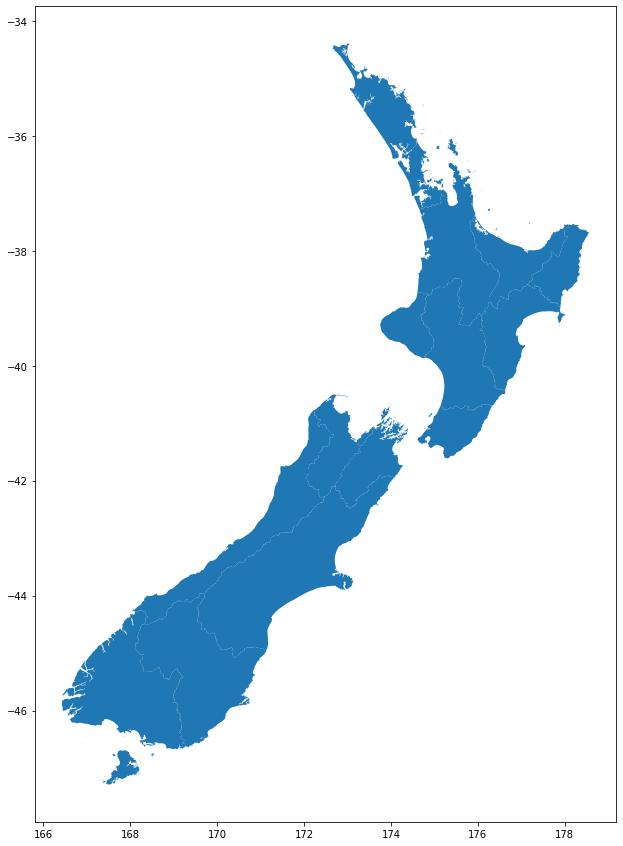

In [142]:
nz.plot()

In [135]:
"""
aggregate administrative, trade and bank df, concat them,then groupby area, calculate the JOB_COUNT,put the final df write to
csv file named region_sum2
"""
#read csv file
nz_job_count = pd.read_csv('/Users/wangzhuoxin/Desktop/project_resource/region_sum2.csv')
nz_job_count

,REGC2016_N,JOB_COUNT
0,Auckland Region,6029
1,Bay of Plenty Region,421
2,Canterbury Region,1238
3,Gisborne Region,155
4,Hawke's Bay Region,243
5,Manawatu-Wanganui Region,202
6,Marlborough Region,31
7,Northland Region,162
8,Otago Region,551
9,Southland Region,183


In [136]:
nz_job_count.dtypes

REGC2016_N    object
JOB_COUNT      int64
dtype: object

In [137]:
# left join nz_job_count by 'REGC2016N' column, based on nz
nz_joined = nz.merge(nz_job_count ,on='REGC2016_N',how = 'left')
nz_joined

,REGC2016,REGC2016_N,AREA_SQ_KM,LAND_SQ_KM,rmapshaperid,geometry,JOB_COUNT
0,01,Northland Region,12510.3503,12497.9209,0,"MULTIPOLYGON (((174.70210 -35.95510, 174.70580...",162.0
1,02,Auckland Region,4940.8756,4939.8049,1,"MULTIPOLYGON (((175.16600 -36.90360, 175.16900...",6029.0
2,03,Waikato Region,24578.1774,23899.7930,2,"MULTIPOLYGON (((174.86390 -38.10250, 174.86610...",1270.0
3,04,Bay of Plenty Region,12280.4622,12070.5112,3,"MULTIPOLYGON (((177.13920 -38.01110, 177.13480...",421.0
4,05,Gisborne Region,8385.8161,8385.8161,4,"MULTIPOLYGON (((178.34320 -38.37900, 178.34600...",155.0
5,06,Hawke's Bay Region,14191.2980,14137.2063,5,"MULTIPOLYGON (((177.03000 -39.83170, 177.02850...",243.0
6,07,Taranaki Region,7254.3159,7254.3159,6,"POLYGON ((174.61510 -38.70660, 174.61400 -38.7...",56.0
7,08,Manawatu-Wanganui Region,22220.5036,22220.5036,7,"POLYGON ((176.08570 -39.12940, 176.08460 -39.1...",202.0
8,09,Wellington Region,8119.5100,8048.6185,8,"MULTIPOLYGON (((174.86530 -41.25270, 174.86780...",1847.0
9,12,West Coast Region,23319.6480,23243.8118,9,"MULTIPOLYGON (((168.88340 -43.85930, 168.88650...",10.0


In [138]:
# fill na data change to 
nz_joined = nz_joined.fillna(0)
# change the JOB_COUNT column type to integer
nz_joined['JOB_COUNT'] = nz_joined['JOB_COUNT'].astype('int')

In [139]:
nz_joined

,REGC2016,REGC2016_N,AREA_SQ_KM,LAND_SQ_KM,rmapshaperid,geometry,JOB_COUNT
0,01,Northland Region,12510.3503,12497.9209,0,"MULTIPOLYGON (((174.70210 -35.95510, 174.70580...",162
1,02,Auckland Region,4940.8756,4939.8049,1,"MULTIPOLYGON (((175.16600 -36.90360, 175.16900...",6029
2,03,Waikato Region,24578.1774,23899.7930,2,"MULTIPOLYGON (((174.86390 -38.10250, 174.86610...",1270
3,04,Bay of Plenty Region,12280.4622,12070.5112,3,"MULTIPOLYGON (((177.13920 -38.01110, 177.13480...",421
4,05,Gisborne Region,8385.8161,8385.8161,4,"MULTIPOLYGON (((178.34320 -38.37900, 178.34600...",155
5,06,Hawke's Bay Region,14191.2980,14137.2063,5,"MULTIPOLYGON (((177.03000 -39.83170, 177.02850...",243
6,07,Taranaki Region,7254.3159,7254.3159,6,"POLYGON ((174.61510 -38.70660, 174.61400 -38.7...",56
7,08,Manawatu-Wanganui Region,22220.5036,22220.5036,7,"POLYGON ((176.08570 -39.12940, 176.08460 -39.1...",202
8,09,Wellington Region,8119.5100,8048.6185,8,"MULTIPOLYGON (((174.86530 -41.25270, 174.86780...",1847
9,12,West Coast Region,23319.6480,23243.8118,9,"MULTIPOLYGON (((168.88340 -43.85930, 168.88650...",10


<AxesSubplot:>

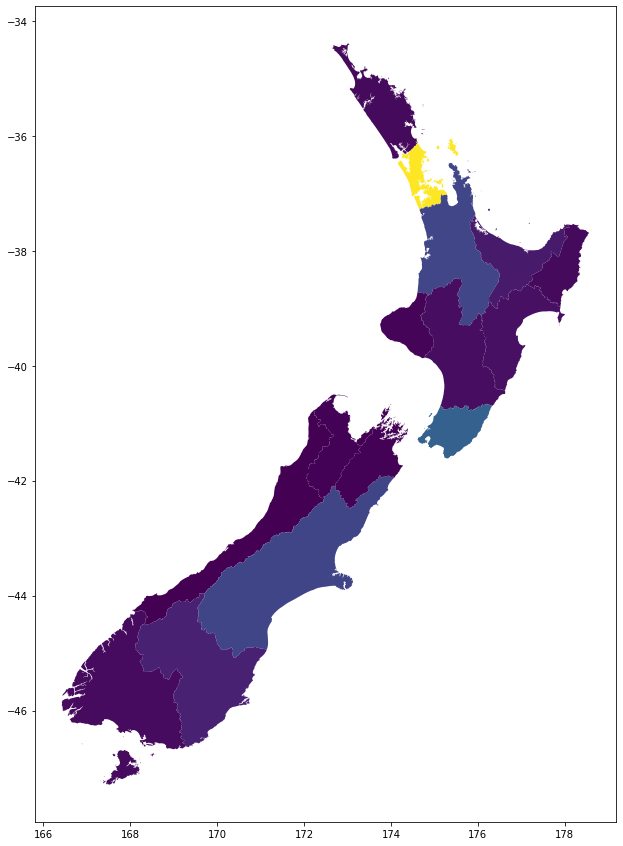

In [140]:
# plot the heatmap based on the column that "JOB_COUNT"
nz_joined.plot(column = 'JOB_COUNT')

<AxesSubplot:>

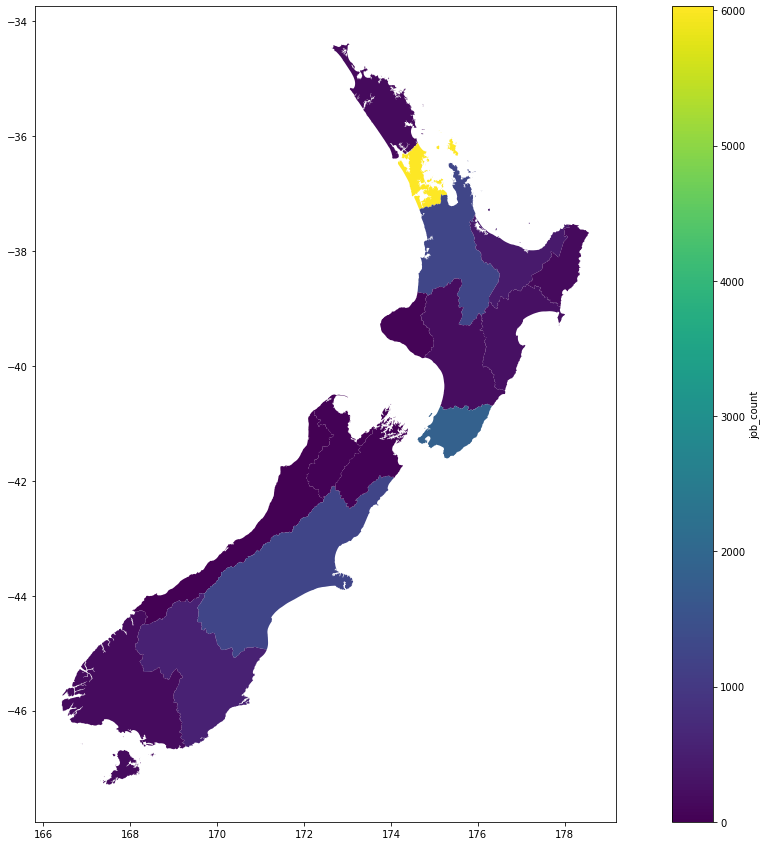

In [143]:
# draw the heat map with legend
fig_legend ,ax_legend = plt.subplots(1,1)
nz_joined.plot(column = 'JOB_COUNT',ax = ax_legend,legend = True,legend_kwds = {'label':'job_count','orientation':'vertical'})